# MA933 Assignment 1

*Student ID: 2260253*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotting
plt.rcParams.update({'font.size': 16})

**Q1(c)**

In [2]:
def SRWclosed(p, tmax, length, Nsim, init_state):
    # function simulates a simple random walk with closed boundary conditions, taking in parameters:
    # p - probability of jumping up a step
    # tmax - number of time steps to simulate each realization 
    # length - number of states in S = {1, 2, ..., length}
    # Nsim - number of realizations 
    # init_state - initial starting point (must lie in S)
    q = 1 - p
    Y = np.zeros((Nsim,tmax+1)) # matrix holding simulations with Nsim rows
    Y[:,0] = init_state # first column contains starting point init_state at t = 0
    
    for k in range(Nsim): # for Nsim realizations...
        for j in range(tmax): # for tmax time steps...
            r = np.random.rand() # random number generator in Uniform(0,1)
            
            # closed boundary condition: p(1,1) = q
            if Y[k,j] == 1:
                if r<p:
                    x = 1
                else:
                    x = 0
            
            # closed boundary condition: p(length,length) = p
            elif Y[k,j] == length:
                if r<p:
                    x = 0
                else:
                    x = -1
                    
            # at other states, we jump up with probability p and jump down with probability q
            else:        
                if r<p:
                    x = 1
                else:
                    x = -1
    
            Y[k,j+1] = Y[k,j] + x # state at time t + 1 is updated by x
        
    return Y

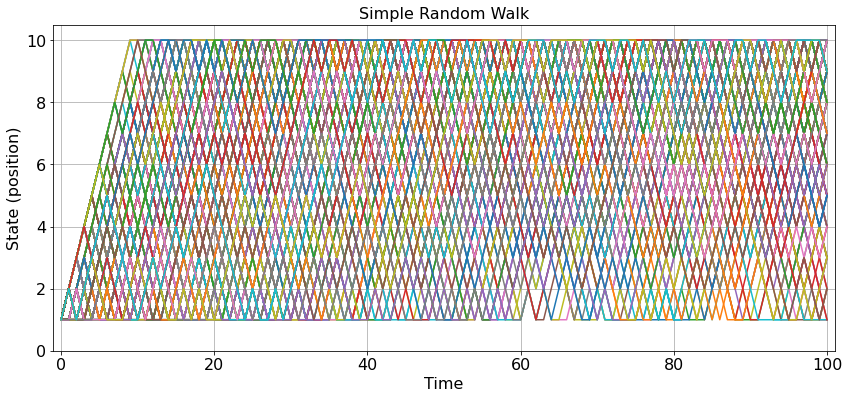

In [3]:
#Inputs
p = 0.6
tmax = 100
L = 10
y_0 = 1
N = 500

Yc = SRWclosed(p, tmax, L, N, y_0)

#plot the output matrix Y for a sanity check
plt.figure(figsize = (14,6))
for k in range(N):
    plt.plot(range(tmax+1), Yc[k,:])
     
plt.xlabel('Time',fontsize=16)
plt.ylabel('State (position)',fontsize=16)
plt.title('Simple Random Walk',fontsize=16)

plt.xlim([-1, tmax+1])
plt.ylim([0, 10.5])
plt.grid()

/home/ndoyle/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


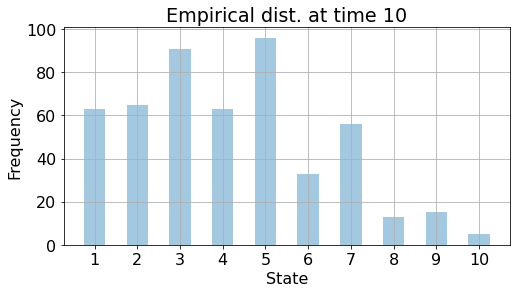

In [4]:
# empirical distribution at time 10
t1 = 10
bins = np.arange(0.75,10.75,0.5)

plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 10')
plt.grid()
sns.distplot(Yc[:,t1],bins=bins,kde=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

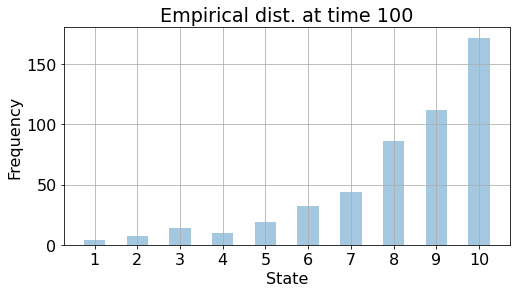

In [5]:
# empirical distribution at time 100
t2 = 100

plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 100')
plt.grid()
sns.distplot(Yc[:,t2],bins=bins,kde=False)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

Our stationary distribution from (a) for $p \neq q$ was

$$\mathbf{\pi} = \pi_1
    \begin{pmatrix}
    1 & \dfrac{p}{1-p} & \Big{(}\dfrac{p}{1-p}\Big{)}^2 & ... & \Big{(}\dfrac{p}{1-p}\Big{)}^{L-1}
    \end{pmatrix}$$
    
where $\pi_1$ is a normalization constant. In our simulations $p = 0.6 \implies \frac{p}{1-p} = 1.5$. This makes our stationary distribution weighted to the right and thus we would expect the long-term behaviour of the Chain to attract most of the distribution towards states at or close to $L$. At time $t = 10$, the empirical distribution is rather uniform due to our initial condition $Y_0 = 1$. Our distribution has not had sufficient time steps to approach stationarity. However, we can see at time $t = 100$, the empirical distribution is skewed right and closely resembles the theoretical stationary distribution.

**Q1(d)**

In [6]:
#Inputs
p = 0.6
L = 10
y_0 = 1
N = 1

Yd_50 = SRWclosed(p, 50, L, N, y_0) # run 1 realization for 50 time steps
Yd_500 = SRWclosed(p, 500, L, N, y_0) # run 1 realization for 500 time steps

In [7]:
# record the proportion of each state occuring in Yd_50 and Yd_500 respectively
counts_50 = np.zeros((L))
counts_50[0] = -1/50 # want to exclude the t=0 starting point
for i in range(len(counts_50)):
    counts_50[i] += np.count_nonzero(Yd_50 == i+1)/50
    
counts_500 = np.zeros((L))
counts_500[0] = -1/500
for i in range(len(counts_500)):
    counts_500[i] += np.count_nonzero(Yd_500 == i+1)/500

print(counts_50)
print(np.sum(counts_50))

[0.06 0.06 0.12 0.24 0.26 0.12 0.06 0.06 0.02 0.  ]
1.0


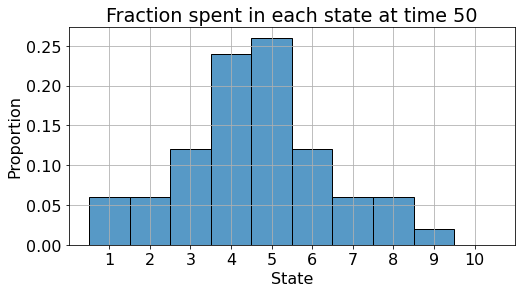

In [8]:
bins = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize = (8,4))
plt.title('Fraction spent in each state at time 50')
plt.grid()
sns.histplot(x=bins, weights=counts_50, discrete=True)
plt.xticks(bins)
plt.xlabel("State")
plt.ylabel("Proportion")
plt.show()

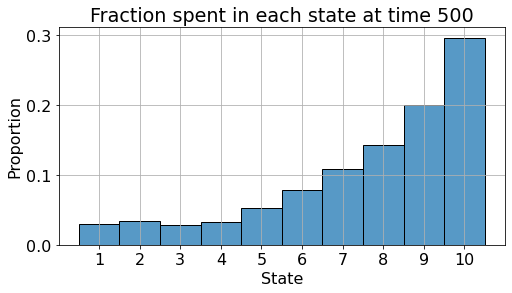

In [9]:
plt.figure(figsize = (8,4))
plt.title('Fraction spent in each state at time 500')
plt.grid()
sns.histplot(x=bins, weights=counts_500, discrete=True)
plt.xticks(bins)
plt.xlabel("State")
plt.ylabel("Proportion")
plt.show()

As in **Q1(c)**, we would expect the distribution to gradually disperse away from our stationary state $Y_0 = 1$ and approach our skewed-right theoretical stationary distribution for large time. Our histograms mirror the plots in **Q1(c)** and confirm that our theoretical stationary distribution from **Q1(a)** is viable. As $p > q$, we would expect to spent much more time in state $L$ over state $1$. 

**Q2(c)**

In [10]:
#solving the system of linear equations for x = (a b c)
import numpy.linalg as la

A = np.array([[1,1,1],[1,-2,-5],[1,4,25]])
b = np.array([1,-2,5])

x = la.solve(A,b)
x

array([0.05555556, 0.88888889, 0.05555556])

**Q3(c)**

In [11]:
def Polya(k, tmax, gamma, f):
    # function which simulates the generalised Polya urn Markov Chain, taking parameters:
    # k: number of distinct ball colours
    # tmax: time to simulate
    # gamma: reinforcement parameter
    # f: k-sized array of fitness parameters across k balls
    # Assumes we simulate for 1 realization

    X = np.ones((k,tmax+1)) # matrix which stores simulation with time progressing along columns
    X[:,0] = np.ones(k) # initial condition
        
    for n in range(tmax):
        
        # retrieve current state X(n) and define the transition probabilities
        current_state = X[:,n]
        ps = (f*X[:,n]**gamma)/(np.sum(f*current_state**gamma))

        # r defines the index of ball k which we choose randomly according to probability ps
        r = np.random.choice(range(k),replace=True,p = ps)

        # update next state X(n+1)
        X[:,n+1] = X[:,n]
        X[r,n+1] += 1
        
    return X

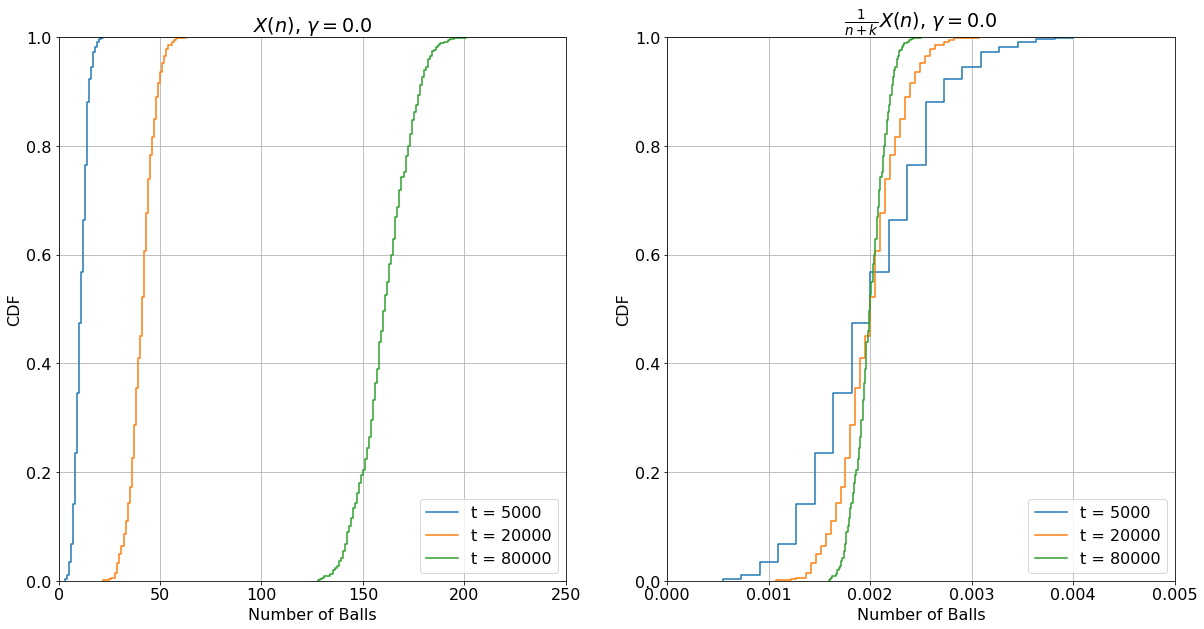

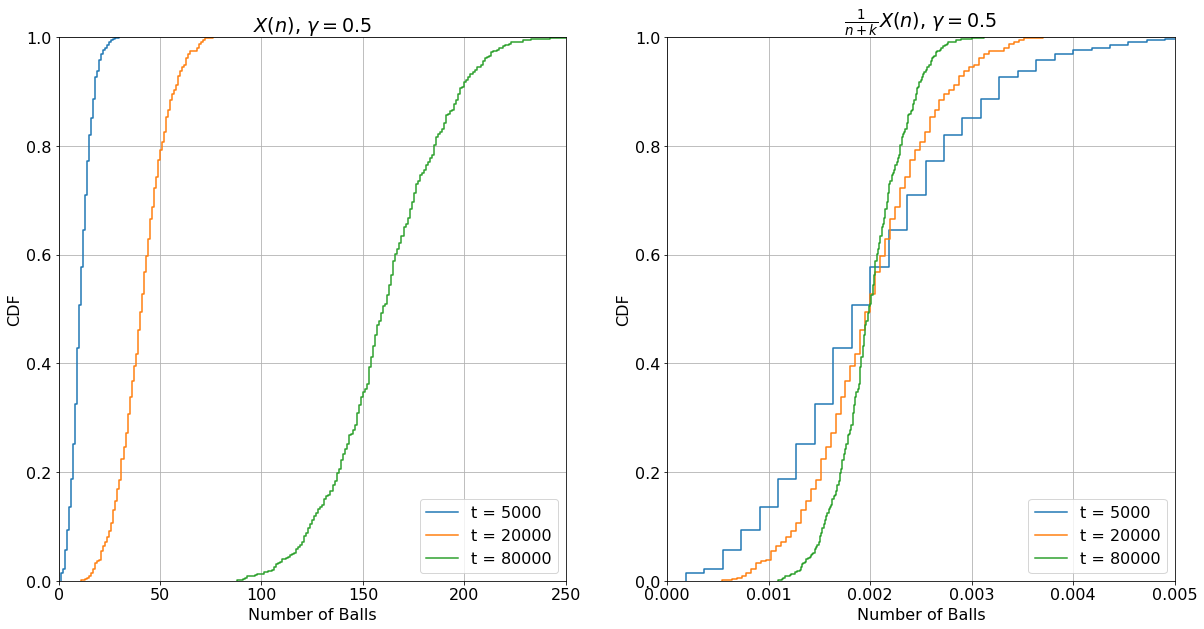

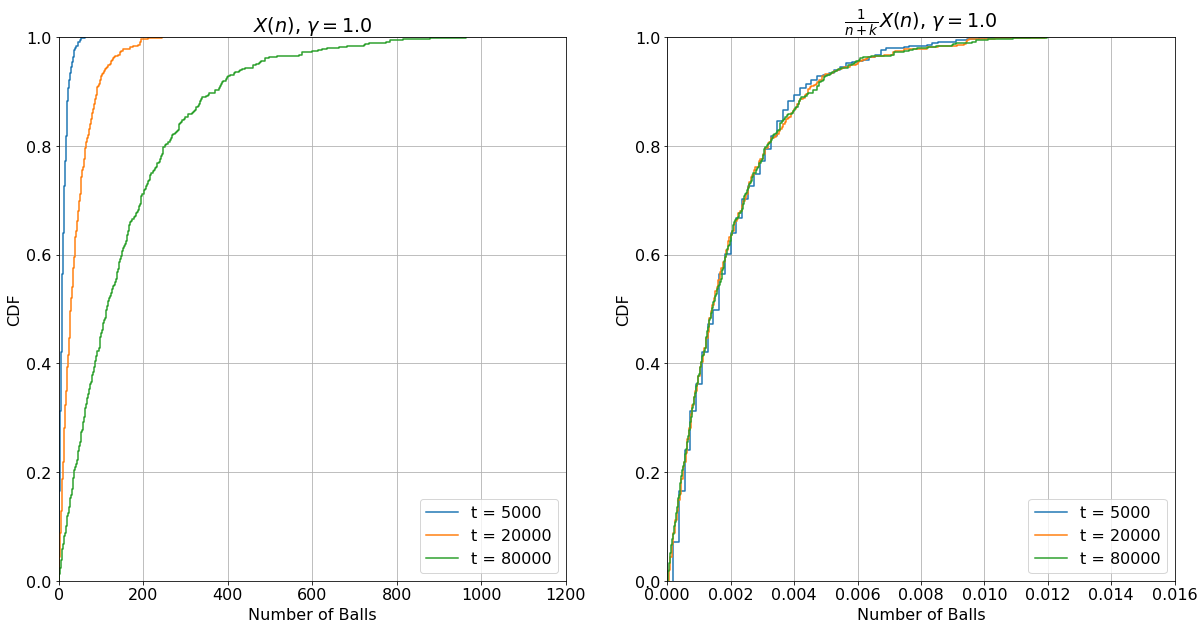

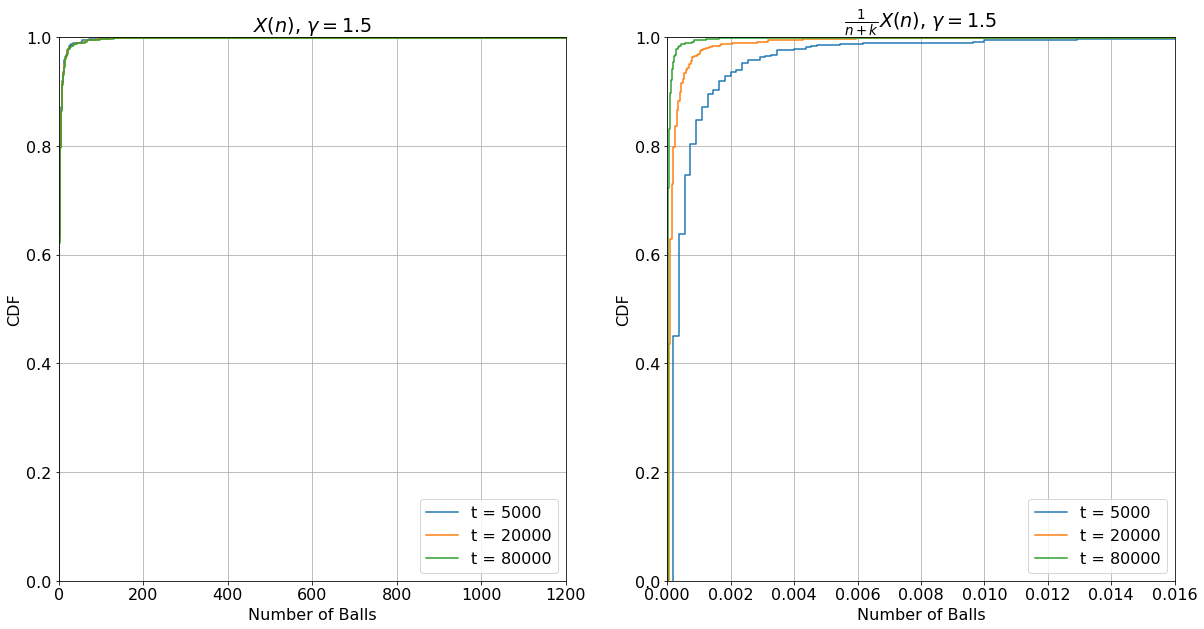

In [12]:
# Inputs
k = 500
t1 = 5000
t2 = 20000
t3 = 80000
ts = np.array([t1, t2, t3])
gammas = np.array([0, 0.5, 1, 1.5])
f = np.ones(k)

# for loop will run four simulations of the Polya urn MC for varying gamma to end time t3
# from these we extract X(t1), X(t2) and X(t3) and plot the empirical CDF for both X(n) 
# and normalised 1/(n+k) X(n) on two seperate figures.
for y in gammas:
    X = Polya(k, ts[-1], y, f)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    
    for T in ts:
        sns.ecdfplot(X[:,T], label='t = %d' % T, ax = ax[0])
        sns.ecdfplot((1/(T+k))*X[:,T], label='t = %d' % T, ax = ax[1])
    
    # plot aesthetics
    for i in [0,1]:
        ax[i].set_xlabel('Number of Balls')
        ax[i].set_ylabel('CDF')
        ax[i].legend(loc = 'lower right')
        ax[i].grid()
        
    if y == 0 or y == 0.5:
        ax[0].set_xlim(0,250)
        ax[1].set_xlim(0,0.005)
    
    elif y == 1 or y == 1.5:
        ax[0].set_xlim(0,1200)
        ax[1].set_xlim(0,0.016)
        
    ax[0].set_title('$X(n)$, $\gamma = $%.1f' % y)
    ax[1].set_title('$\\frac{1}{n + k} X(n)$, $\gamma = $%.1f' % y)

$\mathbf{\gamma = 0}$: The CDFs rise from 0 to 1 in a relatively small difference in number of balls. This suggests that the overall composition consists of a rather uniform distribution of ball colours. This is because our transition probabilities are constant between balls due to the variables being raised to the zeroth power. The choice of ball at each time step becomes perfectly random and we expect any differences in their distribution to be minimal.

$\mathbf{\gamma = 0.5}$: The slopes of the CDFs are more gradual than the above case. This suggests a greater range in our distribution of ball colours and the overall composition at large times will include certain balls at a greater rate over others. 

$\mathbf{\gamma = 1}$: This is the value of $\gamma$ for which the system begins to exhibit monopoly. The CDFs increase rapidly for low number of balls and begins to ease its increase as it approaches 1. This suggests that the majority of ball colours have a count close to zero and some ball colours have a very large count. The range of the CDF is increased, suggesting a larger distribution of counts of ball colours. Most of the overall composition comprises of only a fraction of the many types of ball colours. This is evident from the transition probabilities. Once a ball colour gains a lead in terms of count, they are more likely to be picked out at the next time step, further increasing their relative advantage. We are in approaching a state of monopoly for this choice of $\gamma$.

$\mathbf{\gamma = 1.5}$: The CDFs increase almost vertically from near 0 and almost instantaneously reaches values approaching but not exact to 1, before flattening out and never reaching 1 for our choice of axes range. There is very little to distinguish between the empirical CDFs at different times, suggesting that almost all colours have a count less than 50 while only a few colours dominate the system. The relative advantage in likelihood for ball colours with large counts has been further exaggerated to the increase in power in its transition probabilities, and we arrive at a state of monopoly.

**Q3(d)**

We repeat the above code for varying fitness parameter $f_i$.

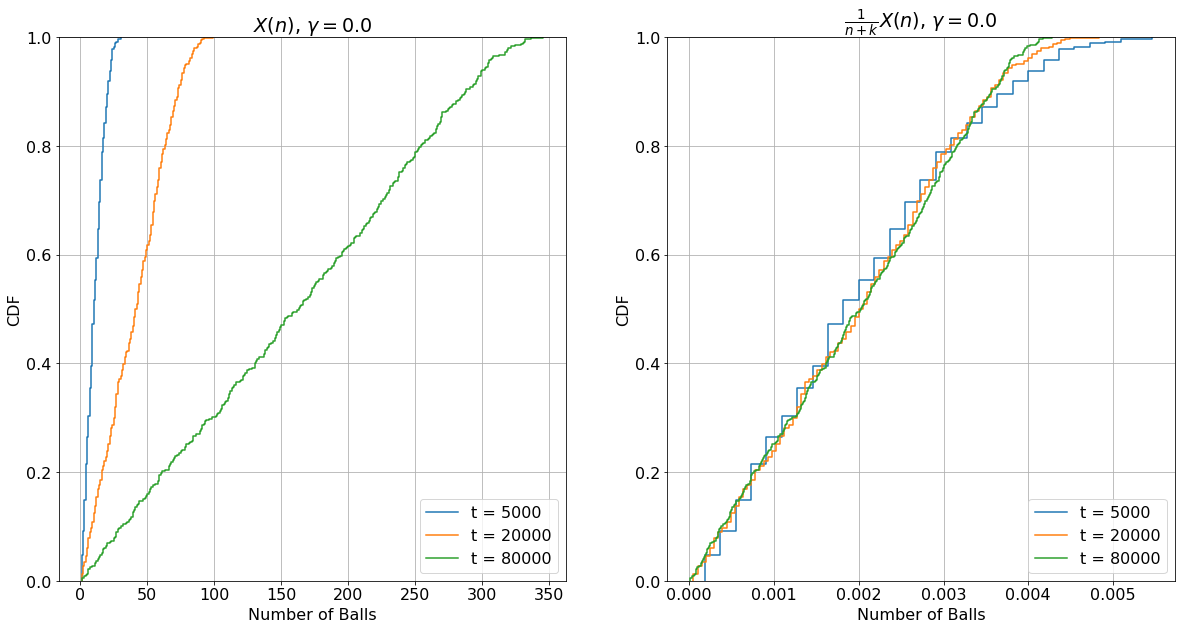

In [13]:
f = np.arange(0.01,10.01,0.02)

for y in [0]:
    X = Polya(k, ts[-1], y, f)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    
    for T in ts:
        sns.ecdfplot(X[:,T], label='t = %d' % T, ax = ax[0])
        sns.ecdfplot((1/(T+k))*X[:,T], label='t = %d' % T, ax = ax[1])
    
    # plot aesthetics
    for i in [0,1]:
        ax[i].set_xlabel('Number of Balls')
        ax[i].set_ylabel('CDF')
        ax[i].legend(loc = 'lower right')
        ax[i].grid()
        
    ax[0].set_title('$X(n)$, $\gamma = $%.1f' % y)
    ax[1].set_title('$\\frac{1}{n + k} X(n)$, $\gamma = $%.1f' % y)

If $f$ was constant between the ball types, then from the transition probabilities we can see that they will cancel as they lie on the numerator and denominator at the same value. If we were to vary $f$ across ball types, say linearly increase it, we witness more interesting behaviour.

Above we have let $f$ take linearly ascending values in $(0.02, 10)$ for $\gamma = 0$. Both the $X(n)$ and $1/(n+k) X(n)$ empirical CDFs appear to increase linearly for all time steps. They also arrive at 1 at a much larger number of balls than their $f_i = $ constant counterparts in **3(c)**. If we return to the transition probability formulae, we now have

$$p(\vec{x}, \vec{x} + \vec{e}_i) = \frac{f_i}{\sum_{j=1}^k f_j}$$

For $\gamma = 0$ we have that the transition probabilities are independent of the current state. However, The transition probabilities are no longer a constant $1/k$ due to varying $f_i$. Certain ball colours will be slightly more likely to be selected, making the range of ball colour counts larger without the system descending into monopoly.